In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("diabetes.csv")

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetes                    0
dtype: int64

We''ll using histograms to visualize the different classes and the values they contain

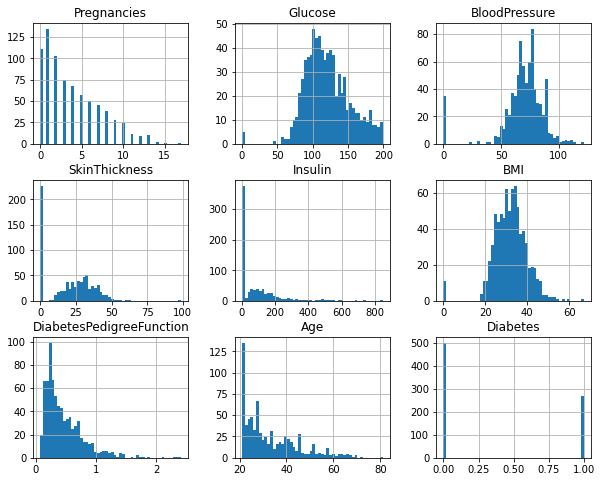

In [14]:
df.hist(bins=50, figsize = (10.0, 8.0))
plt.show()

Since there are multiple values at 0 except columns like Pedigree Function and Age. The only acceptable one can be pregnancy. So I will try to change those values to NaN to give us a better visual idea.

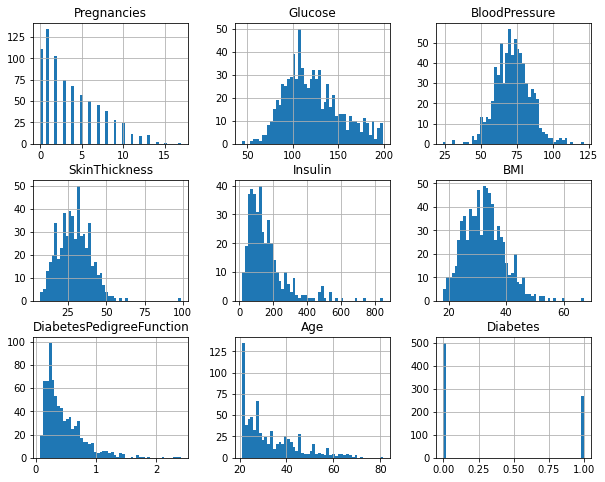

In [15]:
col_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for c in col_missing:
    df[c] = df[c].replace(to_replace=0, value=np.NaN)
df.hist(bins=50, figsize = (10.0, 8.0))
plt.show()

Plots show that Diabetes is skewed towards 0. So there are multiple entries of people with no diabetes

There are 268 (34.90%) people who have diabetes and the remaining 500 (65.10%) who have not been diagnosed with the desease.


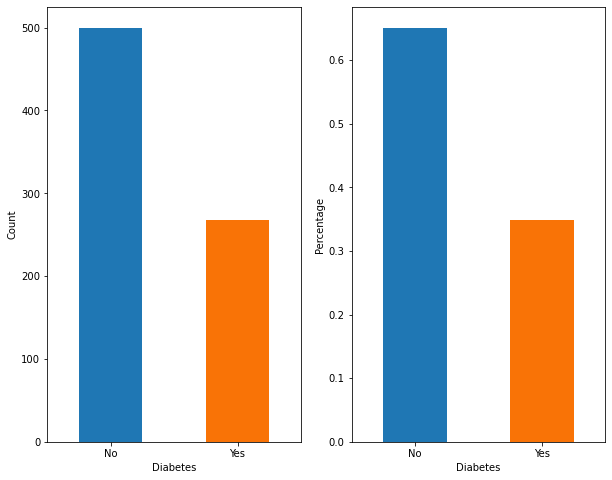

In [16]:
num_diabetes = df[ "Diabetes" ].sum() # total with diabetes number
num_no_diabetes = df.shape[ 0 ] - num_diabetes # total not with diabetes number
perc_diabetes = num_diabetes / df.shape[ 0 ] * 100 # total with diabetes percent
perc_no_diabetes = num_no_diabetes / df.shape[ 0 ] * 100 # total not with diabetes percent
print( "There are %d (%.2f%%) people who have diabetes and the remaining %d (%.2f%%) who have not been diagnosed with the desease." % ( num_diabetes, perc_diabetes, num_no_diabetes, perc_no_diabetes ) )
def plot_diabetes( normalize ):
    plt.grid( False )
    df.Diabetes.value_counts( normalize=normalize ).plot( kind="bar",
                                                         grid=False, 
                                                         color=[ sns.color_palette()[ 0 ],
                                                                sns.colors.xkcd_rgb.get( 'orange' ) ],
                                                         figsize=(10,8) )
    plt.xticks( [ 0, 1 ], [ 'No', 'Yes' ], rotation=0 )
    plt.xlabel( "Diabetes" )
    if ( normalize == False ):
        plt.ylabel( "Count" )
    else:
        plt.ylabel( "Percentage" )    
        
    return
    
plt.subplot( 1, 2, 1 )
plot_diabetes( False )
plt.subplot( 1, 2, 2 )
plot_diabetes( True )
plt.show()

In order to visually investigate the correlation among all the features of our data set, I will display the heat map of the correlation matrix

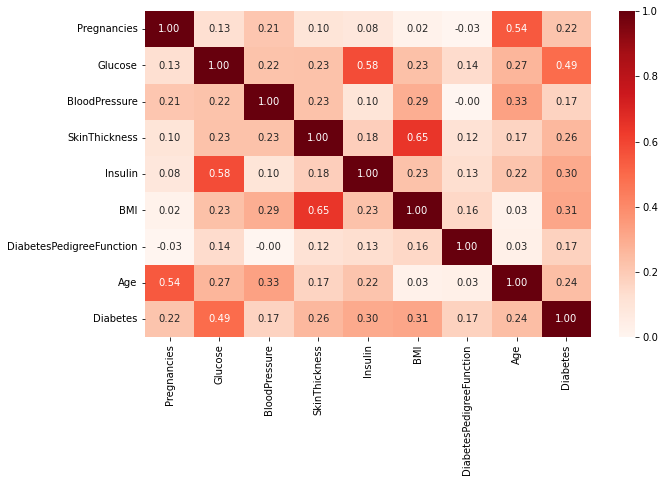

In [17]:
plt.figure(figsize = (10.0, 6.0))
plt.grid(False)
plt.xticks(range(df.shape[1]), df.columns[0:], rotation=0)
plt.yticks(range(df.shape[1]), df.columns[0:], rotation=0)
sns.heatmap(df.corr(), cbar=True, annot=True, square=False, fmt='.2f', cmap=plt.cm.Reds, robust=False, vmin=0)
plt.show()

As we observe not much correlation between features except for some values that are greater than 0.5 The features are:

Age-Pregnancies : Pregnancies can increase with age and stop after a certain age

Glucose-Diabetes : Higher glucose count has higher probability of being diagnose with diabetes

Glucose-Insulin : Higher level Glucose means more Insulin

BMI-SkinThickness : Higher the BMI, fatter the person is

Observing these correlations using scatterplot

C:\Users\dptos\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


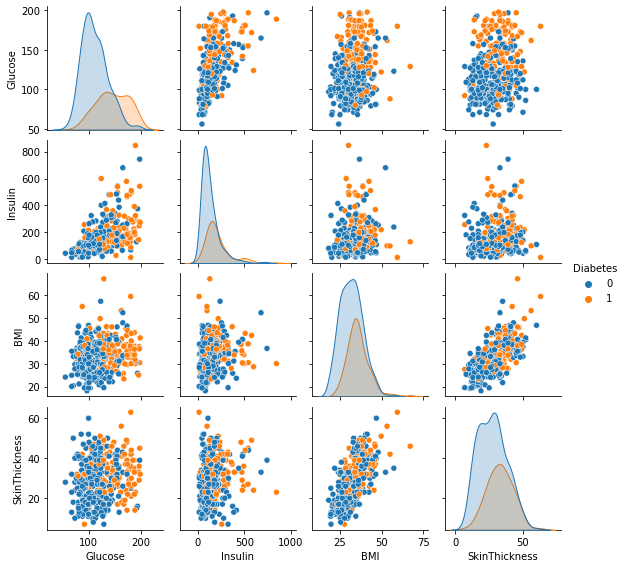

In [18]:
sns.pairplot(df.dropna(), vars = ['Glucose', 'Insulin','BMI','SkinThickness'], 
             size= 2.0, diag_kind='kde', hue='Diabetes')
plt.show()
# As we can see, there is a positive linear relationship between Insulin, Glucose and BMI, SkinThickness. So these factors will play an important role in determining the Diabetes in a person

Separation of Dependent and Independent Variables

In [19]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1:].values

Data PreProcessing

In [21]:
from sklearn.model_selection import train_test_split
# We will start by splitting our data into 70% Training set and 30% Testing set. For this we will use sklearn train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

our data set contains many Null or missing values and so to deal with them,

The two frequently used solutions are:

Removing them from the data set

Estimating those values and adding a median value

Choosing to replace these values with median since the training set is small

In [22]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values = np.nan, strategy='median')
X_train = impute.fit_transform(X_train)
X_test = impute.fit_transform(X_test)

Feature Scaling and Normalization

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In the classification phase, k is a user-defined constant, and an unlabeled vector (a query or test point) is classified by assigning the label which is most frequent among the k training samples nearest to that query point.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, np.ravel(y_train,order='C'))
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [25]:
# score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

# score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max train score 100.0 % and k = [1]
Max test score 79.65367965367966 % and k = [9, 11, 13]


Result Visualisation

C:\Users\dptos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dptos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


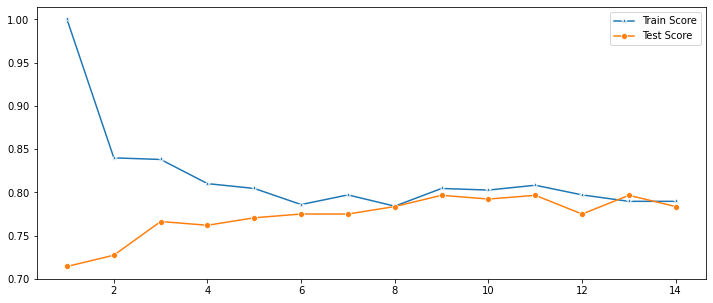

In [26]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')
plt.show()

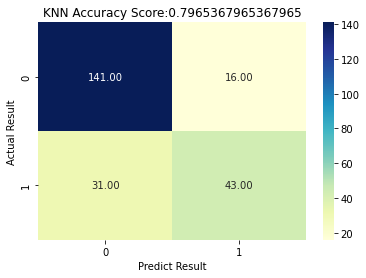

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       157
           1       0.73      0.58      0.65        74

    accuracy                           0.80       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.79      0.80      0.79       231



In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
def resultGraph(cm,title,acc_score):
    sns.heatmap(cm,annot=True,fmt=".2f",cmap="YlGnBu")
    plt.xlabel("Predict Result")
    plt.ylabel("Actual Result")
    plt.title("{} Accuracy Score:{}".format(title,acc_score))
    plt.show()
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,np.ravel(y_train,order='C'))
y_pred = knn.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
# evaluate results with confusion matrix
cm = confusion_matrix(y_test, y_pred)
resultGraph(cm,"KNN", acc_score)
# Report which includes Precision, Recall and F1-Score.
print(classification_report(y_test, y_pred))

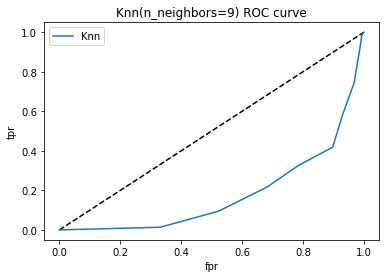

In [29]:
# The area under the ROC curve (AUC) is a measure of how well a parameter distinguishes two groups.
# The closer the ROC curve approaches the upper left corner, the greater the overall accuracy of the test
# We used n_neighbors = 9 as the most commonly used label
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,:-1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# roc_curve's results visualition
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=9) ROC curve')
plt.legend()
plt.show()

In [30]:
# if we want to improve the model a little more
# import GridSearchCV
from sklearn.model_selection import GridSearchCV
# In case of classifier like knn the parameter to be tuned is n_neighbors
params = {'n_neighbors':np.arange(1,50),
              'weights':["uniform","distance"],
              'algorithm':["auto","ball_tree","kd_tree","brute"]# algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'}
              } 

gsc = GridSearchCV(estimator = knn, param_grid = params,
                            scoring = 'accuracy',
                            cv = 10,
                            n_jobs = -1)
grid_search = gsc.fit(X_train, y_train)
bestResult = grid_search.best_score_
bestParams = grid_search.best_params_
print("Best Accuracy Score:{}\nBest Params:{}".format(bestResult,bestParams))

Best Accuracy Score:0.7707896575821105
Best Params:{'algorithm': 'auto', 'n_neighbors': 17, 'weights': 'uniform'}


C:\Users\dptos\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


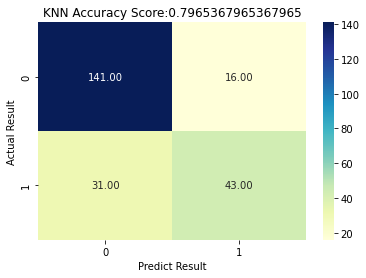

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       157
           1       0.69      0.50      0.58        74

    accuracy                           0.77       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.76      0.77      0.75       231



In [31]:
# we recreated the model using the best parameters
knn = KNeighborsClassifier(n_neighbors=17,weights="uniform",algorithm="auto")
knn.fit(X_train, np.ravel(y_train,order='C'))
y_pred2 = knn.predict(X_test)
acc_score2 = accuracy_score(y_test, y_pred)
cm2 = confusion_matrix(y_test, y_pred)
resultGraph(cm2,"KNN", acc_score2)
print(classification_report(y_test, y_pred2))